In [ ]:
import pandas as pd
# Load the Excel file, skip the first 21 rows and read columns A, B, C, D
df = pd.read_excel('tilos_data.xlsx', skiprows=range(1, 21), usecols='A:D')
# Rename the columns
df.columns = ['date', '10min', 'time', 'value']
#print(df)

In [2]:
import pandas as pd

# Load the CSV file
file_path = 'tilos_data.csv'
df = pd.read_csv(file_path)

# Strip trailing whitespace from the 'date' column
df['date'] = df['date'].str.strip()
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%d.%m.%y %H:%M:%S')
resampled_df = df.resample('H', on='datetime').sum(numeric_only=True)['value'].reset_index()

df


,date,10min,time,value
0,01.01.21,1,00:00:00,42.933
1,01.01.21,2,00:10:00,42.933
2,01.01.21,3,00:20:00,41.167
3,01.01.21,4,00:30:00,41.600
4,01.01.21,5,00:40:00,40.433
...,...,...,...,...
25339,25.06.21,2,23:10:00,87.767
25340,25.06.21,3,23:20:00,87.367
25341,25.06.21,4,23:30:00,85.800
25342,25.06.21,5,23:40:00,85.600


In [17]:
resampled_df['value'] = resampled_df['value'].round(2)
resampled_df.to_csv('tilos_hourly.csv', index=False)

<Axes: title={'center': 'Tilos radio'}, xlabel='datetime'>

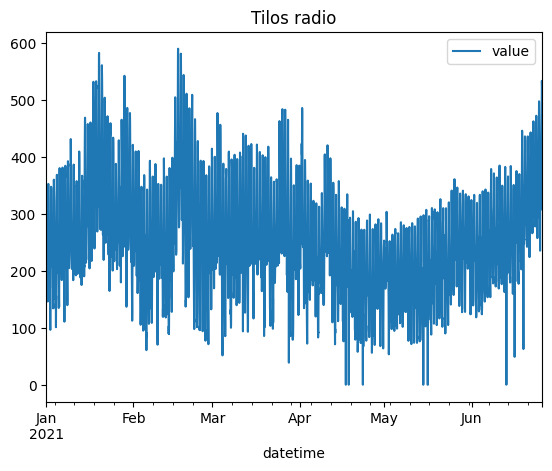

In [21]:
resampled_df.plot(x='datetime', y='value', kind='line', title='Tilos radio')